In [1]:
import numpy as np

from lava.magma.core.run_conditions import RunSteps
from lava.magma.core.run_configs import Loihi1SimCfg

from lava.lib.dnf.inputs.spike_source.process import SpikeSource
from lava.lib.dnf.inputs.inputs import GaussInputPattern, SpikeInputGenerator

import matplotlib.pyplot as plt
import numpy

In [2]:
input_pattern = GaussInputPattern(shape=(60,), amplitude=1000.0, mean=30, stddev=40)
spike_generator = SpikeInputGenerator(input_pattern)

[      inf       inf       inf       inf       inf       inf 8.037e+03
 4.466e+03 2.545e+03 1.487e+03 8.900e+02 5.470e+02 3.440e+02 2.220e+02
 1.470e+02 1.000e+02 7.000e+01 5.000e+01 3.600e+01 2.700e+01 2.100e+01
 1.700e+01 1.300e+01 1.100e+01 9.000e+00 8.000e+00 7.000e+00 7.000e+00
 6.000e+00 6.000e+00 6.000e+00 6.000e+00 6.000e+00 7.000e+00 7.000e+00
 8.000e+00 9.000e+00 1.100e+01 1.300e+01 1.700e+01 2.100e+01 2.700e+01
 3.600e+01 5.000e+01 7.000e+01 1.000e+02 1.470e+02 2.220e+02 3.440e+02
 5.470e+02 8.900e+02 1.487e+03 2.545e+03 4.466e+03 8.037e+03       inf
       inf       inf       inf       inf]
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf]


In [3]:
num_steps = 1000

spikes = np.zeros((spike_generator.shape[0], num_steps))

for i in range(num_steps):
    spikes[:, i] = spike_generator.generate(i)

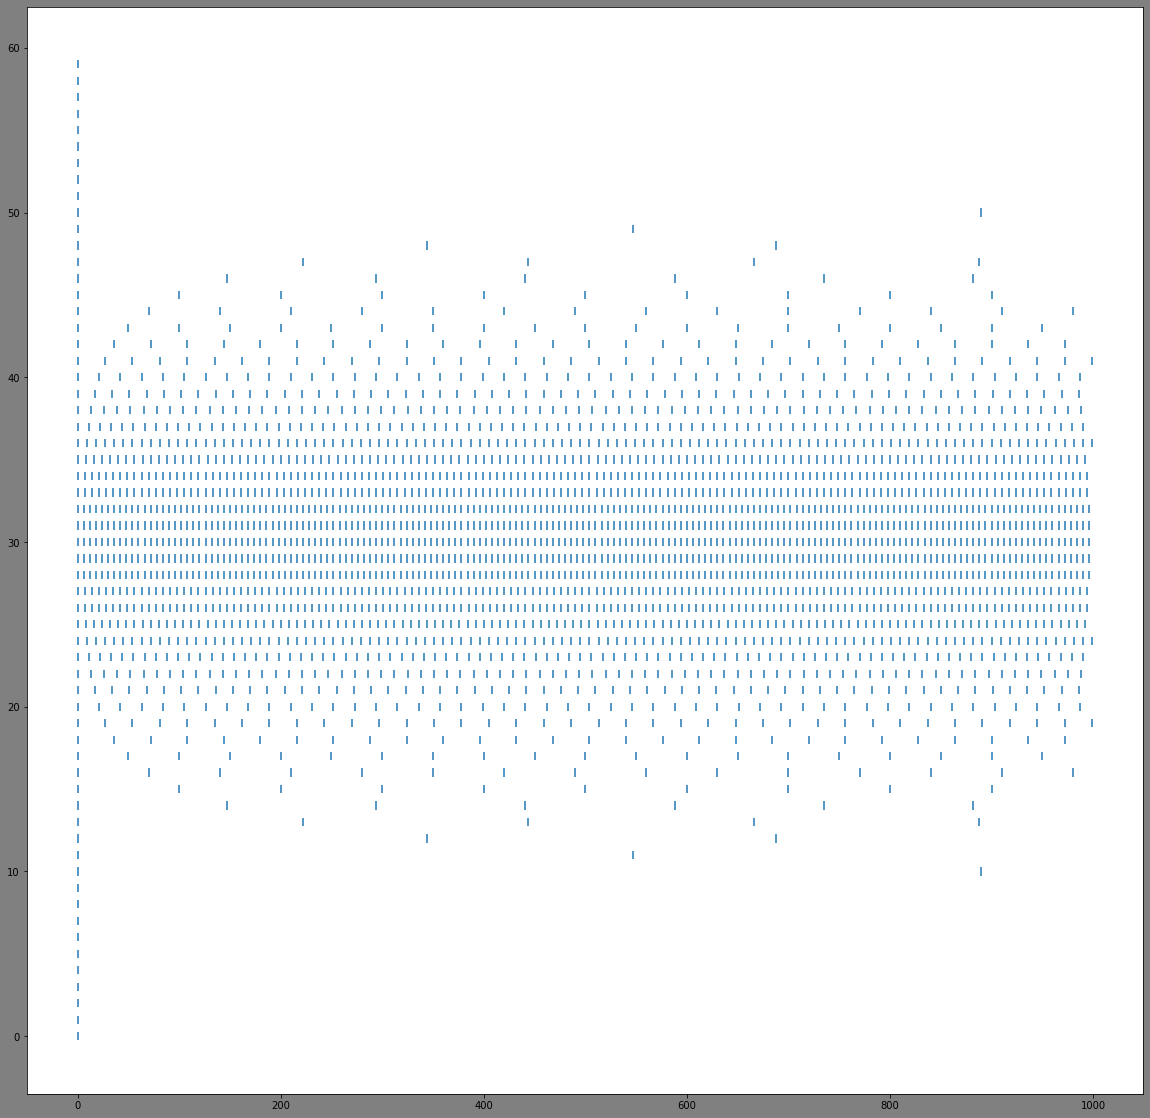

In [4]:
plt.figure(figsize=(20, 20), facecolor="grey")

for idx, spike_array in enumerate(spikes):
    spike_positions = np.where(spike_array == 1.0)
    plt.eventplot(spike_positions, lineoffsets=idx, linelengths=0.5)

plt.show()

[   6.    6.    6.    6.    6.    6.    6.    6.    6.    6.   12.   12.
   18.   30.   42.   60.   90.  120.  168.  228.  288.  354.  462.  546.
  672.  750.  858.  858. 1002. 1002. 1002. 1002. 1002.  858.  858.  750.
  672.  546.  462.  354.  288.  228.  168.  120.   90.   60.   42.   30.
   18.   12.   12.    6.    6.    6.    6.    6.    6.    6.    6.    6.]


<function matplotlib.pyplot.show(close=None, block=None)>

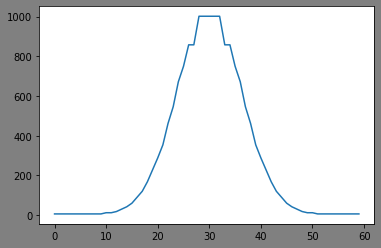

In [5]:
TIME_STEPS_PER_MINUTE = 6000.0

count = []

for _, spike_array in enumerate(spikes):
    spike_positions = np.where(spike_array == 1.0)
    count.append(spike_positions[0].shape[0])

count = np.array(count) * TIME_STEPS_PER_MINUTE / num_steps
print(count)

plt.figure(facecolor="grey")

plt.plot(count)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

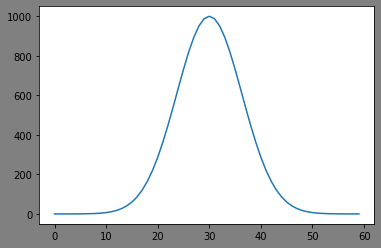

In [6]:
plt.figure(facecolor="grey")

plt.plot(input_pattern.pattern)

plt.show